Linear Equation Systems
=======================

<img src="fruit.jpg" alt="Drawing" style="width: 500px;"/>

Image by [Jonas Kakaroto](https://unsplash.com/de/@jkakaroto?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash)
on [Unsplash](https://unsplash.com/de/fotos/rote-apfelfrucht-neben-grunem-apfel-und-gelbe-frucht-auf-braun-geflochtenem-korb-5JQH9Iqnm9o?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash).

In this exercise, we will use **linear equations** to find unknown
variables.

Consider the following four persons shopping fruit. You know how many
items everybody has bought and how much they spent, but the item prices
are unknown.

| fruit   | apple 🍎 | banana 🍌 | cherry 🍒 | grapes 🍇 | **total** |
|---------|----------|-----------|------------|------------|------------|
| Ada     | 2        | 0         | 4          | 2          | 24         |
| Bashir  | 1        | 2         | 6          | 4          | 39         |
| Choi    | 2        | 0         | 8          | 8          | 58         |
| Deryl   | 2        | 1         | 9          | 4          | 51         |

We can treat this data as a set of linear equations:

$$ada = 2 \cdot apple + 0 \cdot banana + 4 \cdot cherry + 2 \cdot grapes = 24$$

$$bashir = 1 \cdot apple + 2 \cdot banana ...$$

That is, we have four equations with four unknowns. You could use high
school algebra to solve this manually.

Matrix representation
---------------------

The shortcut linear algebra offers represents the fruit items as a
matrix **F**, and the total bill as a column vector $\vec{bills}$:

In [1]:
import numpy as np
from numpy.linalg import inv, det

In [2]:
F = np.array([
    [2, 0, 4, 2],
    [1, 2, 6, 4],
    [2, 0, 8, 8],
    [2, 1, 9, 4]])

bills = np.array([24, 39, 58, 51])

Is the equation system solvable?
--------------------------------

Not all linear equation systems are solvable. Some have an infinite
number of solutions, others are not solvable at all.

By checking, whether the matrix **F** is invertible, we verify that it
is actually possible to solve the problem:

In [4]:
G = inv(F)

When you multiply, the inverted matrix with the original one, you should
obtain an identity matrix:

In [5]:
np.dot(F, G) 

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Another way to ensure the matrix is non-singular is checking that its
**determinant** is nonzero:

In [8]:
det(F)

np.float64(-63.99999999999998)

Gauss-Jordan Elimination
------------------------

The [Gauss-Jordan Elimination](https://en.wikipedia.org/wiki/Gaussian_elimination)
procedure now rearranges the values in the matrix to the **row echelon
form** so that each row allows to determine one of the variable. NumPy
does all the work for us:

In [7]:
prices = np.linalg.solve(F, bills)
prices

array([1., 1., 4., 3.])

Use the dot product to check whether you can reproduce the original
bills:

In [ ]:
np.dot(..., ...)

#### Warning

If you accidentally transpose the matrix, you will get an entirely
different result. In this case, some prices will be negative. But it is
important to make some manual sanity check if the numbers are
reasonable.

Unsolvable matrices
-------------------

Not all square matrices can be inverted. They are **singular**. For
instance, when nobody has bought any bananas, we won\'t be able to
figure out the price:

In [3]:
F2 = np.array([
     [2, 0, 4, 2],
     [1, 0, 6, 4],
     [2, 0, 8, 8],
     [2, 0, 9, 4]])

inv(F2)

LinAlgError: Singular matrix

This should result in an error without even looking at the prices.

Matrices are also singular when rows are **colinear** (multiples of each
other):

In [9]:
F3 = np.array([[3, 1, 50], [10, 10, 10], [20, 20, 20]])
inv(F3)

LinAlgError: Singular matrix

Apply some changes to make these matrices invertible.

For many singular matrices it is not immediately obvious what exactly is
making them singular.

Visualize the matrix
--------------------

To visualize the fruit baskets I recommend a grouped bar plot:

Text(0.5, 0, 'fruit [kg]')

<Figure size 400x400 with 0 Axes>

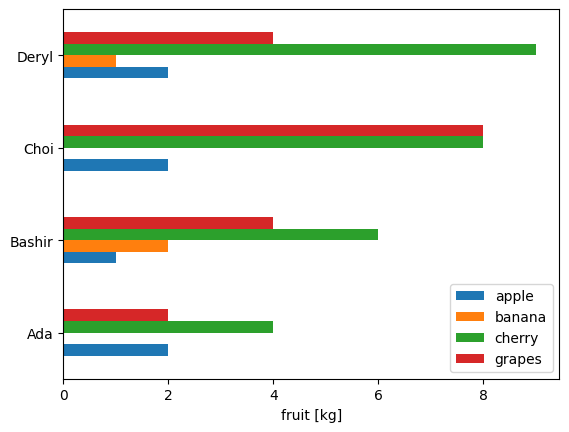

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 4))
df = pd.DataFrame(F, columns=["apple", "banana", "cherry", "grapes"],
                  index=["Ada", "Bashir", "Choi", "Deryl"])
df.plot.barh()
plt.xlabel("fruit [kg]")

### Links
Linear Equations go much deeper. Here are some starting points:

-   The [Gurobi Burrito Optimization
    Game](https://www.gurobi.com/burrito-optimization-game/) lets you
    explor more complex linear problems.
-   [PuLP](https://coin-or.github.io/pulp/) is a free linear problem
    solver for Python.
-   [Gauss-Jordan Elimination on
    Wikipedia](https://en.wikipedia.org/wiki/Gaussian_elimination)
:::